# Chapter 2: Creating the Models

# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import normaltest
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import (
    ElasticNet,
    ElasticNetCV,
    Lasso,
    LassoCV,
    LinearRegression,
    Ridge,
    RidgeCV,
)
from sklearn.metrics import mean_squared_error, r2_score  # squared=False for RMSE
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PowerTransformer

# Loading the Data

In [2]:
train = pd.read_csv("datasets/train_clean.csv")
test = pd.read_csv("datasets/test_clean.csv")
test_idx = pd.read_csv("datasets/test.csv")

In [3]:
train.head()

,overall_qual,heating_qc,gr_liv_area,full_bath,kitchen_qual,totrms_abvgrd,fireplaces,fireplace_qu,lot_frontage,lot_area,...,bsmt_qual,total_bsmt_sf,garage_finish,garage_cars,garage_age,sold_years,house_age,remod_years,central_air,logsaleprice
0,6,4,1479,2,2,6,0,0,87.9,13517,...,3,725.0,2,2.0,46.0,-35.0,46.0,17.0,1,11.779129
1,7,4,2122,2,2,8,1,3,43.0,11492,...,4,913.0,2,2.0,25.0,-14.0,26.0,25.0,1,12.301383
2,5,2,1057,1,2,5,0,0,68.0,7922,...,3,1057.0,1,1.0,69.0,-58.0,69.0,15.0,1,11.599103
3,5,3,1444,2,1,7,0,0,73.0,9802,...,4,384.0,3,2.0,15.0,-5.0,16.0,15.0,1,12.066811
4,6,2,1445,2,1,6,0,0,82.0,14235,...,2,676.0,1,2.0,65.0,-111.0,122.0,29.0,1,11.838626


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049 entries, 0 to 2048
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   overall_qual   2049 non-null   int64  
 1   heating_qc     2049 non-null   int64  
 2   gr_liv_area    2049 non-null   int64  
 3   full_bath      2049 non-null   int64  
 4   kitchen_qual   2049 non-null   int64  
 5   totrms_abvgrd  2049 non-null   int64  
 6   fireplaces     2049 non-null   int64  
 7   fireplace_qu   2049 non-null   int64  
 8   lot_frontage   2049 non-null   float64
 9   lot_area       2049 non-null   int64  
 10  lot_shape      2049 non-null   int64  
 11  exter_qual     2049 non-null   int64  
 12  mas_vnr_stone  2049 non-null   int64  
 13  mas_vnr_none   2049 non-null   int64  
 14  mas_vnr_brick  2049 non-null   int64  
 15  neighborhood   2049 non-null   int64  
 16  bsmt_qual      2049 non-null   int64  
 17  total_bsmt_sf  2049 non-null   float64
 18  garage_f

In [5]:
test.head()

,overall_qual,heating_qc,gr_liv_area,full_bath,kitchen_qual,totrms_abvgrd,fireplaces,fireplace_qu,lot_frontage,lot_area,...,neighborhood,bsmt_qual,total_bsmt_sf,garage_finish,garage_cars,garage_age,sold_years,house_age,remod_years,central_air
0,6,3,1928,2,1,9,0,0,69.0,9142,...,2,2,1020,1,1,112.0,16.0,112.0,72.0,0
1,5,2,1967,2,2,10,0,0,70.0,9662,...,2,4,1967,3,2,45.0,16.0,45.0,45.0,1
2,7,4,1496,2,3,7,1,4,58.0,17104,...,4,4,654,2,2,16.0,16.0,16.0,16.0,1
3,5,2,968,1,2,5,0,0,60.0,8520,...,2,3,968,1,2,87.0,15.0,99.0,16.0,1
4,6,3,1394,1,2,6,2,4,74.9,9500,...,2,4,1394,2,2,59.0,13.0,59.0,59.0,1


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   overall_qual   878 non-null    int64  
 1   heating_qc     878 non-null    int64  
 2   gr_liv_area    878 non-null    int64  
 3   full_bath      878 non-null    int64  
 4   kitchen_qual   878 non-null    int64  
 5   totrms_abvgrd  878 non-null    int64  
 6   fireplaces     878 non-null    int64  
 7   fireplace_qu   878 non-null    int64  
 8   lot_frontage   878 non-null    float64
 9   lot_area       878 non-null    int64  
 10  lot_shape      878 non-null    int64  
 11  exter_qual     878 non-null    int64  
 12  mas_vnr_stone  878 non-null    int64  
 13  mas_vnr_none   878 non-null    int64  
 14  mas_vnr_brick  878 non-null    int64  
 15  neighborhood   878 non-null    int64  
 16  bsmt_qual      878 non-null    int64  
 17  total_bsmt_sf  878 non-null    int64  
 18  garage_fin

# Pre-processing

Let's define a function that can give us all the metrics at one go.

In [7]:
def lin_reg_metrics(lr, X_train, y_train, pred, X_test, y_test):
    """
    gives the RMSE, the cross-validation score, and the R^2 value for the train and test models. Assumes a log scale used.
    """
    y_act = np.exp(y_test)
    y_pred = np.exp(pred)
    print(f"RMSE Score: {mean_squared_error(y_act, y_pred, squared=False)}")
    print(f"Train Score (R^2): {lr.score(X_train,y_train)}")
    print(f"Test Score (R^2): {lr.score(X_test,y_test)}")
    print(f"CrossVal Score (R^2): {cross_val_score(lr,X_train,y_train,cv=10).mean()}")
    print(
        f'CrossVal Score (RMSE): {abs(cross_val_score(lr,X_train,np.exp(y_train),cv=10,scoring="neg_root_mean_squared_error").mean())}'
    )

The scores are:
1. the RMSE score of the predicted value and the actual value from the testing data - tells us how accurate our model is
2. the $r^2$ (coefficient of determination) value of our training data gives how well our model fits the training data
3. same as above, but for the test data
4. the mean $r^2$ value for the training data across all the cross-valuation scores
5. same as above, but for RMSE - could be lower or higher, depending on how the data is split.

We can then perform a train-test split on the `train` dataset.

In [8]:
X = train.drop(columns="logsaleprice")
y = train["logsaleprice"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

## Scaling the data

We scale data to normalize them to the standard normal curve, and for easier comparison between data of different magnitudes. According to the official [sklearn website](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html), `StandardScaler` is sensitive to outliers, but `PowerTransformer` isn't. We shall use the latter.

In [9]:
pt = PowerTransformer()
Z_train = pt.fit_transform(X_train)
Z_test = pt.transform(X_test)

In [10]:
print(f"Z_train shape is: {Z_train.shape}")
print(f"y_train shape is: {y_train.shape}")
print(f"Z_test shape is: {Z_test.shape}")
print(f"y_test shape is: {y_test.shape}")

Z_train shape is: (1434, 25)
y_train shape is: (1434,)
Z_test shape is: (615, 25)
y_test shape is: (615,)


# Baseline Score

We will be setting a baseline score such that the `saleprice` variable for the train set is used to predict the test set. Given the minimum amount of information to predict the model, the subsequent adding of features should improve this baseline score considerably.

In [11]:
lr_base = LinearRegression()
lr_base.fit(pd.DataFrame(Z_train[:, -1]), y_train)
lr_base_pred = lr_base.predict(pd.DataFrame(Z_test[:, -1]))

In [12]:
lin_reg_metrics(
    lr_base,
    pd.DataFrame(Z_train[:, -1]),
    y_train,
    lr_base_pred,
    pd.DataFrame(Z_test[:, -1]),
    y_test,
)

RMSE Score: 80826.10422267922
Train Score (R^2): 0.1479011412771961
Test Score (R^2): 0.1492141070703341
CrossVal Score (R^2): 0.1382131712508336
CrossVal Score (RMSE): 74777.37199239884


# Linear Regressor

We will first be building a basic OLS model.

In [13]:
lr = LinearRegression()
lr.fit(Z_train, y_train)
lr_pred = lr.predict(Z_test)

In [14]:
lin_reg_metrics(lr, Z_train, y_train, lr_pred, Z_test, y_test)

RMSE Score: 23973.981796178472
Train Score (R^2): 0.8849219547900887
Test Score (R^2): 0.8748929790515798
CrossVal Score (R^2): 0.8780937401282319
CrossVal Score (RMSE): 31869.36207779501


# Regularization

## Ridge Regularization

We will use a cross valuation technique to generate the best alpha (regularization hyperparameter) for the best fitting of our model.

In [15]:
ridge_cv = RidgeCV(alphas=np.linspace(0, 100, 50), cv=10)
ridge_cv.fit(Z_train, y_train)
ridge_cv.alpha_

18.367346938775512

We can then fit the optimal alpha into our `Ridge` model.

In [16]:
ridge = Ridge(alpha=ridge_cv.alpha_)
ridge.fit(Z_train, y_train)
ridge_pred = ridge.predict(Z_test)
lin_reg_metrics(ridge, Z_train, y_train, ridge_pred, Z_test, y_test)

RMSE Score: 24068.648604401773
Train Score (R^2): 0.8847451886203214
Test Score (R^2): 0.8747435681842315
CrossVal Score (R^2): 0.8783406383700907
CrossVal Score (RMSE): 31843.81652232081


## Lasso Regularization

In [17]:
l_alphas = np.logspace(-3, 10, 100)
lasso_cv = LassoCV(alphas=l_alphas, cv=10, max_iter=50000)
lasso_cv.fit(Z_train, y_train)
lasso_cv.alpha_

0.001

In [18]:
lasso = Lasso(alpha=lasso_cv.alpha_, max_iter=5000)
lasso.fit(Z_train, y_train)
lasso_pred = lasso.predict(Z_test)
lin_reg_metrics(lasso, Z_train, y_train, lasso_pred, Z_test, y_test)

RMSE Score: 24258.499811495494
Train Score (R^2): 0.8843545172330356
Test Score (R^2): 0.8740560657009282
CrossVal Score (R^2): 0.8781181474154087
CrossVal Score (RMSE): 31869.360746299953


In [19]:
np.exp(lasso_pred)[0:10]

array([128282.44522522, 260769.52798832, 101031.52407913, 133105.21924412,
       121505.43172253, 275695.08172088, 194992.71683157, 182118.41546799,
       237022.52731561, 143137.54943902])

## Elastic Net Regression

For the elastic net model, we will attempt two different methods to get the optimal alpha and l1 ratio (the ratio between the lasso and ridge contributions).

In [20]:
l1_ratios = np.linspace(0.01, 1.0, 25)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10)
optimal_enet.fit(Z_train, y_train)

print(optimal_enet.alpha_)
print(optimal_enet.l1_ratio_)

0.0015569995396851413
0.21625000000000003


## GridSearchCV

In [21]:
enet_alphas = np.linspace(0.001, 0.8, 100)
enet_ratio = np.linspace(0.001, 1, 50)
param_grid = dict(alpha=enet_alphas, l1_ratio=enet_ratio)

enet = ElasticNet(max_iter=5000)
grid = GridSearchCV(estimator=enet, param_grid=param_grid, cv=5)

In [22]:
%timeit grid.fit(Z_train, y_train)

43.8 s ± 2.41 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
print(
    f"The best parameters are {grid.best_params_} with a score of {grid.best_score_:.2f}"
)

The best parameters are {'alpha': 0.00907070707070707, 'l1_ratio': 0.001} with a score of 0.88


In [24]:
# optimal hyperparameters from ElasticNetCV
enet = ElasticNet(alpha=0.00156, l1_ratio=0.216, max_iter=5000)
enet.fit(Z_train, y_train)
enet_pred = enet.predict(Z_test)
lin_reg_metrics(enet, Z_train, y_train, enet_pred, Z_test, y_test)

RMSE Score: 24066.071324563047
Train Score (R^2): 0.8847435171206973
Test Score (R^2): 0.8745338590645613
CrossVal Score (R^2): 0.8782826881266799
CrossVal Score (RMSE): 31862.360896806982


In [40]:
# optimal hyperparameters from GridSearchCV
enet = ElasticNet(alpha=0.009, l1_ratio=0.001, max_iter=2000)
enet.fit(Z_train, y_train)
enet_pred = enet.predict(Z_test)
lin_reg_metrics(enet, Z_train, y_train, enet_pred, Z_test, y_test)

RMSE Score: 24032.040601027737
Train Score (R^2): 0.8848131591705948
Test Score (R^2): 0.874806562555242
CrossVal Score (R^2): 0.8783227315778902
CrossVal Score (RMSE): 31848.171386011032


# Training the model with `test`

It seems that our bare bones linear regression model gives the best predictions for new data, with the lowest RMSE score of 23973. It also has a relatively close $r^2$ score when fitted with the training and test data, which means that it has a good bias-variance tradeoff. Furthermore, the cross valuation RMSE is amongst the lowest of all the models, which means it fits the training data pretty well. We will use it for our final model.

In [26]:
pt_final_train = PowerTransformer()
pt_final_test = PowerTransformer()
Z = pt_final_train.fit_transform(X)
Z_final = pt_final_test.fit_transform(test)

In [27]:
lr_final = LinearRegression()
lr_final.fit(Z, y)
lr_final_sub = np.exp(lr_final.predict(Z_final))

In [28]:
submission = pd.DataFrame()
submission["Id"] = test_idx["Id"]
submission["SalePrice"] = lr_final_sub

In [29]:
submission.head()

,Id,SalePrice
0,2658,127600.240444
1,2718,182849.954369
2,2414,210041.134443
3,1989,130660.982270
4,625,177712.005716


In [30]:
submission.count()

Id           878
SalePrice    878
dtype: int64

In [31]:
submission.to_csv("datasets/submission.csv", index=False)

# Business Recommendations

## Important Features

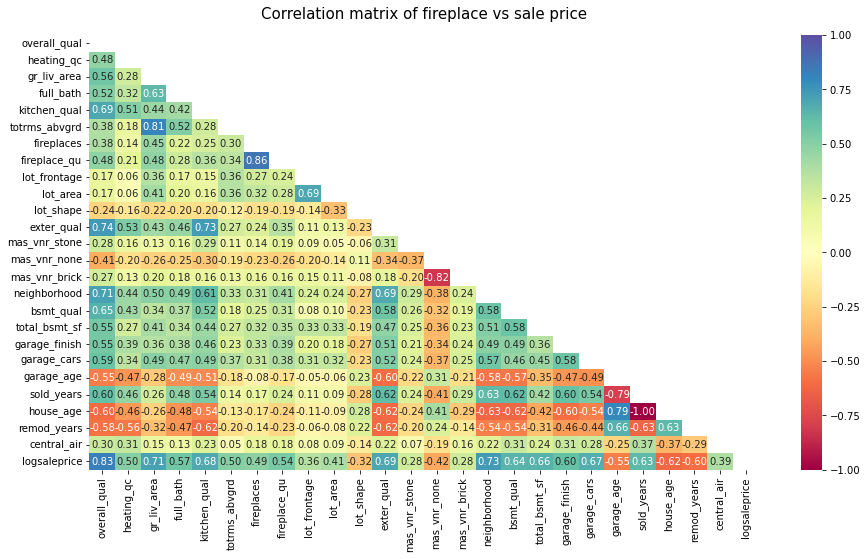

In [32]:
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(15, 8))
heatmap = sns.heatmap(
    corr, annot=True, fmt=".2f", mask=mask, cmap="Spectral", vmax=1, vmin=-1
)
heatmap.set_title(
    "Correlation matrix of fireplace vs sale price", fontdict={"fontsize": 15}, pad=16
);

It seems that our linear regression model is decent enough to handle new data, with a kaggle RMSE score of 22038 and a cross valuation RMSE of 31917. Therefore, we are confident enough to present it to the client and make some recommendations.

From the selected features, it seems like attention has to be paid to the following variables:
* the material and finish of the house and its exterior quality will definitely affect the prices, and those are the more static features (harder to change)
* the gross living area, together with the sizes and quality of the garage and basement, also plays a big part
* the amenities that are important include the quality of the heating, the number and quality of fireplaces, the quality of the kitchen, the central air-conditioning, and the number of full bathrooms
* the important exterior qualities include the lot area and frontage, and the type of masonry veneer (it's better to have it than not at all!)
* the type of neighborhood also plays a huge role in the sale price, understandably
* however, the older the house and garage, and the longer since the last remodeling, the lower the sale price
* the shape of the lot also has an inverse relationship with the sale price - the more irregular it is the lower the prices!

On the topic of neighborhoods, the best seems to be Stone Brooke, Northridge Heights, Northridge, Green Hills, and Veenker, although your best bet might be Northridge Heights as it has the most number of houses but also the 2nd highest housing price.  

In [33]:
train.corr().iloc[[-1]].squeeze().sort_values(ascending=False)

logsaleprice     1.000000
overall_qual     0.825607
neighborhood     0.731007
gr_liv_area      0.708456
exter_qual       0.692654
kitchen_qual     0.683070
garage_cars      0.667439
total_bsmt_sf    0.655644
bsmt_qual        0.642841
sold_years       0.626193
garage_finish    0.598384
full_bath        0.565977
fireplace_qu     0.542376
heating_qc       0.502071
totrms_abvgrd    0.501322
fireplaces       0.486948
lot_area         0.405289
central_air      0.387044
lot_frontage     0.363835
mas_vnr_brick    0.282828
mas_vnr_stone    0.277033
lot_shape       -0.318317
mas_vnr_none    -0.415727
garage_age      -0.551204
remod_years     -0.599779
house_age       -0.624820
Name: logsaleprice, dtype: float64

The overall quality and condition of the exterior of the house, the neighborhood the house is in, and the gross living area are the important factors to look out for when buying a property, because those are the most difficult to flip but also have the highest relevance to the sale price. They should also look for newer houses, or that have done the latest touch ups.

On the other hand, features like the roof condition, deck/porch, and pool do not feature heavily in the sale prices, and can be lower in priority.

## Analysis and Limitations

We learnt in class that an OLS model should satisfy the following conditions:

- Linearity: the relationship between the features and the dependent variable should be approximately linear
- Independence: the features and observations should be roughly independent
- Normality: our residuals should be normally distributed
- Equal variances (homoscedasticity): the residuals should have approximately equal variances for each feature

Of course, as we have seen, a lot of our data do not follow a normal distribution, which would be ideal for entering into a model. This could be improved by simply taking more observations, but it is hard to observe perfect normalcy in real-world data.

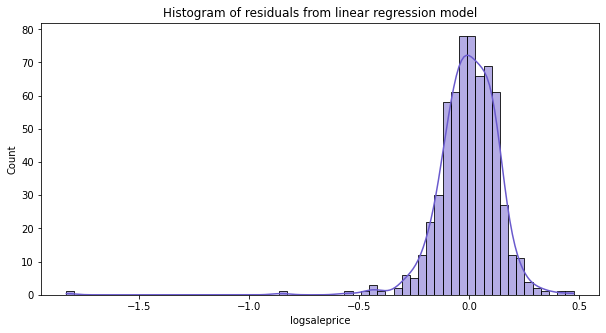

In [34]:
plt.figure(figsize=(10, 5))
plt.title("Histogram of residuals from linear regression model")
sns.histplot(y_test - lr_pred, kde=True, color="slateblue");

In [35]:
normaltest(y_test - lr_pred)

NormaltestResult(statistic=556.8798026819288, pvalue=1.18874117527305e-121)

The figure looks approximately normal except for the large number of outliers. These make it skewed, which would mean that the normalcy condition fails.

There is relatively high interdependence of some of the features as can be seen from the correlation matrix in this section, but it is not large. Some interdependence is to be expected from our dataset as there are many overlapping features. The regularization models help to tame some of the interdependences.

Whether this model can be generalized to other contexts is a tricky question, as this would depend on domain knowledge on what features are values by house buyers in that context. For example, a HDB in Singapore would definitely not prize lot frontage highly, as there is negligible access to the void decks. This is a highly contextual model, and would need to be fine-tuned before being applied in other contexts.

# Appendix A: Other Models

This section is mostly for my reference, to go back and test out the RMSE of other models when we have learnt them.

## K-Nearest Neighbors

In [36]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(Z_train, y_train)
knn_pred = knn.predict(Z_test)

In [37]:
lin_reg_metrics(knn, Z_train, y_train, knn_pred, Z_test, y_test)

RMSE Score: 31722.19922557327
Train Score (R^2): 0.8690027350608598
Test Score (R^2): 0.8270381939261112
CrossVal Score (R^2): 0.8348817998195154
CrossVal Score (RMSE): 30169.59500962204


## Random Forest Regressor

In [38]:
max_features_range = np.arange(1, 6, 1)
n_estimators_range = np.arange(10, 210, 10)
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)

rf = RandomForestRegressor()
grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

In [39]:
grid.fit(Z_train, y_train)

KeyboardInterrupt: 

In [ ]:
print(
    f"The best parameters are {grid.best_params_} with a score of {grid.best_score_:.2f}"
)

In [ ]:
randfor = RandomForestRegressor(max_features=5, n_estimators=200)
randfor.fit(Z_train, y_train)
randfor_pred = randfor.predict(Z_test)

In [ ]:
lin_reg_metrics(randfor, Z_train, y_train, randfor_pred, Z_test, y_test)